In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file to get an overview of the data
df = pd.read_csv('D:\Hyper Island\math_assessment/assessment_da25.csv')
df.head()

,Variant,Number of page views,GMV (in $),Number of add to cart,Clicks on media,Time on Page (sec),user_id
0,A,5,0.0,0,2,74,0
1,A,4,0.0,4,1,21,1
2,A,4,0.0,2,0,1,2
3,A,5,0.0,0,1,26,3
4,A,5,0.0,3,3,46,4


In [5]:
from scipy.stats import ttest_ind

# Separate the data for Variant A and Variant B
variant_a = df[df['Variant'] == 'A']
variant_b = df[df['Variant'] == 'B']

# Perform T-tests for GMV, Time on Page and clicks on media
ttest_gmv = ttest_ind(variant_a['GMV (in $)'], variant_b['GMV (in $)'], equal_var=False)
ttest_time_on_page = ttest_ind(variant_a['Time on Page (sec)'], variant_b['Time on Page (sec)'], equal_var=False)
ttest_clicks_on_media = ttest_ind(variant_a['Clicks on media'], variant_b['Clicks on media'], equal_var=False)
ttest_gmv, ttest_time_on_page, ttest_clicks_on_media

(TtestResult(statistic=-1.2839539769831623, pvalue=0.19930776178517315, df=1986.8862227081215),
 TtestResult(statistic=0.5554299489081426, pvalue=0.5786630478332149, df=1989.8790205360176),
 TtestResult(statistic=3.1710702328903153, pvalue=0.001541857715988478, df=1994.655646693956))

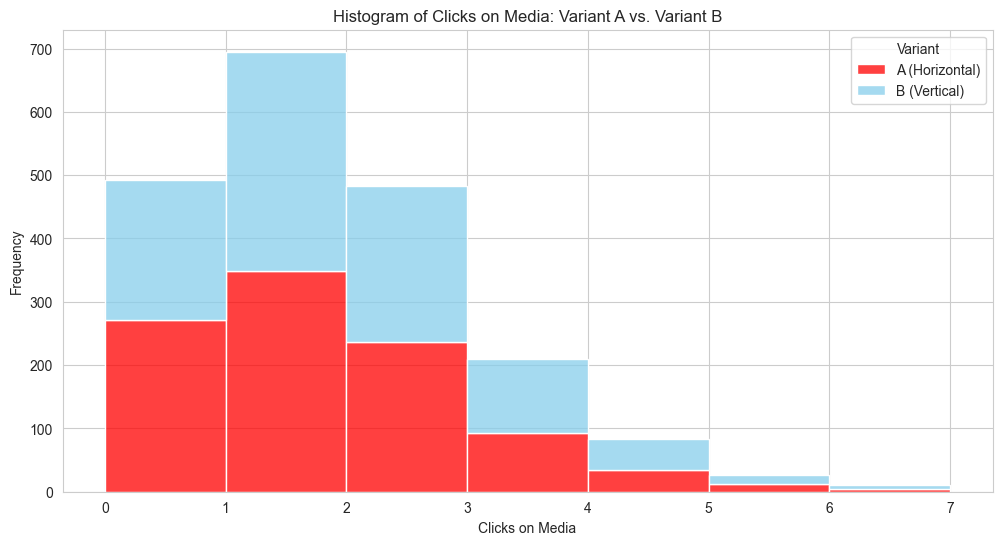

In [12]:
#set style
sns.set_style("whitegrid")

# Filter the data for clicks on media for both variants
clicks_A = df[df['Variant'] == 'A']['Clicks on media']
clicks_B = df[df['Variant'] == 'B']['Clicks on media']

# Plotting the distribution of clicks on media for both variants
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x="Clicks on media", hue="Variant", multiple="stack", palette=['skyblue', 'red'], bins=range(int(df['Clicks on media'].max()) + 1))

plt.title("Histogram of Clicks on Media: Variant A vs. Variant B")
plt.xlabel("Clicks on Media")
plt.ylabel("Frequency")
plt.legend(title='Variant', labels=['A (Horizontal)', 'B (Vertical)'])
plt.show()

In [16]:
mean_A = clicks_A.mean()
median_A = clicks_A.median()
std_A = clicks_A.std()

mean_B = clicks_B.mean()
median_B = clicks_B.median()
std_B = clicks_B.std()

print(f"mean_A = {mean_A} and mean_B = {mean_B}")

print(f"median_A = {median_A},median_B = {median_B} ")
      
print(f"std_A = {std_A} , std_B = {std_B}")

mean_A = 1.495 and mean_B = 1.324
median_A = 1.0,median_B = 1.0 
std_A = 1.230239199704061 , std_B = 1.180854952319894


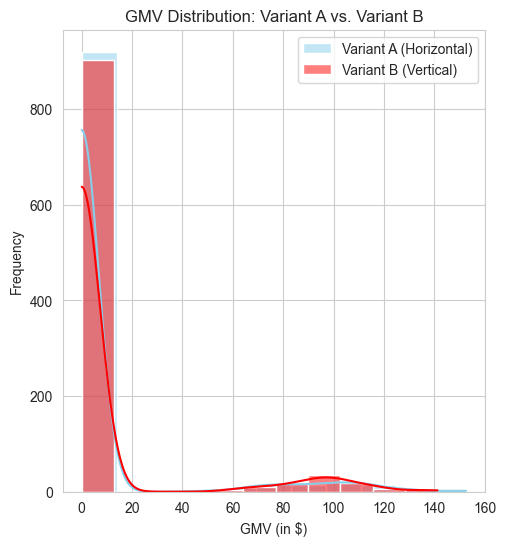

In [18]:
gmv_A = df[df['Variant'] == 'A']['GMV (in $)']
gmv_B = df[df['Variant'] == 'B']['GMV (in $)']
time_on_page_A = df[df['Variant'] == 'A']['Time on Page (sec)']
time_on_page_B = df[df['Variant'] == 'B']['Time on Page (sec)']

# Plotting the histogram for GMV
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(gmv_A, color="skyblue", label="Variant A (Horizontal)", kde=True)
sns.histplot(gmv_B, color="red", label="Variant B (Vertical)", kde=True)
plt.title("GMV Distribution: Variant A vs. Variant B")
plt.xlabel("GMV (in $)")
plt.ylabel("Frequency")
plt.legend()


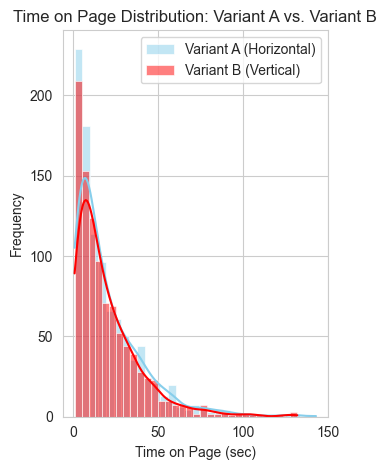

In [19]:
# Plotting the histogram for Time on Page
plt.subplot(1, 2, 2)
sns.histplot(time_on_page_A, color="skyblue", label="Variant A (Horizontal)", kde=True)
sns.histplot(time_on_page_B, color="red", label="Variant B (Vertical)", kde=True)
plt.title("Time on Page Distribution: Variant A vs. Variant B")
plt.xlabel("Time on Page (sec)")
plt.ylabel("Frequency")
plt.legend()

plt.tight_layout()
plt.show()